In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.6, color_codes=True)

/Users/fatma/.pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### To access MySQL database, do port forwarding (with a jump host) by running followinng command in a terminal
#### ssh -o "ServerAliveInterval 60" -L 127.0.0.1:3306:127.0.0.1:3306 -J fatma@idir.uta.edu fatma@idir-server2

In [2]:
import MySQLdb
db = MySQLdb.connect("127.0.0.1","factchecker","checkfact","factchecker_presidential_debate")
cursor = db.cursor()


In [3]:
#### Total number of Sentences (excluding 2016-10-04 Vice Presidential Debate sentences)
query = "SELECT COUNT(*) FROM Sentence WHERE file_id not in ('2016-10-04.txt', '2020-01-14.txt');"
cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

32072


In [4]:
#### Distribution of the sentences over speaker type 
query = "SELECT COUNT(*), role FROM Sentence, Speaker_File \
WHERE Sentence.file_id = Speaker_File.file_id  AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
GROUP BY role;"
cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row)

(26322, 'Interviewee')
(4292, 'Moderator')
(1319, 'Questioner')


In [5]:
#### Number of sentences without a speaker name
query = "SELECT COUNT(*) \
FROM Sentence \
WHERE file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
AND speaker_id = '';"

cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

139


In [6]:
#### Number of sentences less than 5 words
query = "SELECT COUNT(*) FROM Sentence, Speaker_File \
WHERE Sentence.file_id = Speaker_File.file_id  AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
AND role='Interviewee' \
AND length < 5;"

cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

2789


In [7]:
######Sentence distribution among presidential debates
query = "SELECT Sentence.file_id AS 'Presidential Debate Date', COUNT(*) AS 'No. of Sentences'\
     FROM Sentence, Speaker_File WHERE \
     Sentence.file_id = Speaker_File.file_id AND Sentence.speaker_id = Speaker_File.speaker_id \
     AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
     AND role = 'interviewee' AND length >= 5 GROUP BY Sentence.file_id ORDER BY Sentence.file_id;"
cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print("{} - {}".format(row[0].replace(".txt", ""), row[1]))

1960-09-26 - 425
1960-10-07 - 432
1960-10-13 - 372
1960-10-21 - 456
1976-09-23 - 483
1976-10-06 - 472
1976-10-22 - 471
1980-09-21 - 337
1980-10-28 - 469
1984-10-07 - 599
1984-10-21 - 528
1988-09-25 - 721
1988-10-13 - 674
1992-10-11 - 823
1992-10-15 - 863
1992-10-19 - 849
1996-10-06 - 931
1996-10-16 - 874
2000-10-03 - 885
2000-10-11 - 822
2000-10-17 - 785
2004-09-30 - 873
2004-10-08 - 942
2004-10-13 - 830
2008-09-26 - 803
2008-10-07 - 714
2008-10-15 - 737
2012-10-03 - 837
2012-10-16 - 923
2012-10-22 - 858
2016-09-26 - 1012
2016-10-09 - 848
2016-10-19 - 885


In [8]:
######Average sentence length in words
query = "SELECT Sentence.file_id AS 'Presidential Debate Date', SUM(Sentence.length)/COUNT(*) AS 'Avg. Sentence Length'\
     FROM Sentence, Speaker_File WHERE \
     Sentence.file_id = Speaker_File.file_id AND Sentence.speaker_id = Speaker_File.speaker_id \
     AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
     AND role = 'Interviewee' AND length >= 5 GROUP BY Sentence.file_id ORDER BY Sentence.file_id;"
cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print("{} - {}".format(row[0].replace(".txt", ""), row[1]))

1960-09-26 - 22.1812
1960-10-07 - 22.5810
1960-10-13 - 23.4140
1960-10-21 - 20.8816
1976-09-23 - 24.4389
1976-10-06 - 22.4386
1976-10-22 - 23.7665
1980-09-21 - 24.7685
1980-10-28 - 25.6311
1984-10-07 - 19.6127
1984-10-21 - 20.7898
1988-09-25 - 18.0014
1988-10-13 - 18.6261
1992-10-11 - 17.2321
1992-10-15 - 16.8088
1992-10-19 - 17.5053
1996-10-06 - 16.6122
1996-10-16 - 16.1167
2000-10-03 - 16.3017
2000-10-11 - 16.7932
2000-10-17 - 16.1669
2004-09-30 - 15.0389
2004-10-08 - 14.6051
2004-10-13 - 15.5253
2008-09-26 - 18.2279
2008-10-07 - 18.8669
2008-10-15 - 18.6621
2012-10-03 - 17.8411
2012-10-16 - 16.5049
2012-10-22 - 17.8834
2016-09-26 - 14.1354
2016-10-09 - 15.1333
2016-10-19 - 14.4045


In [9]:
##### Average length of the all sentences
query="select sum(length)/count(*) from Sentence, Sentence_User \
where id=sentence_id \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
AND screening=-1;"

cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

14.5639


In [10]:
# Overall Statistics of Participants
query = "select USERNAME,PROFESSION,RANK_E,RANK_W,ANSWERED as '#', A.SKIPPED/A.ANSWERED as SKIP, A.LEN, \
round(A.LEN/18.4217*A.ANSWERED*sign(0.3 - A.RANK_W)*pow((0.3 - A.RANK_W),2),2) AS RANK_L,\
if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, pow((0.3-RANK_W)/0.3, 2.5)*3, 0) ),2), 0) \
as Quality, \
if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, pow((0.3-RANK_W)/0.3, 2.5)*3, 0))\
*pow((A.LEN/18.4217), 1.5)*pow(0.6, A.SKIPPED/A.ANSWERED),2), 0) as PAYRATE,\
if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, \
pow((0.3-RANK_W)/0.3, 2.5)*3, 0) )*pow((A.LEN/18.4217), 1.5)*ANSWERED/100*pow(0.6, A.SKIPPED/A.ANSWERED),2), 0) \
as PAYMENT,\
    NFS,NO,YES,NFS_NFS,NFS_NO,NFS_YES,NO_NFS,NO_NO,NO_YES,YES_NFS,YES_NO,YES_YES \
    from (select \
    Sentence_User.username as USERNAME, profession as PROFESSION, \
    round((pow(sum(if(screening = -1 and response = -1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = -1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = 0, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = 0, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = 1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = 1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = -1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = -1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = 0, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = 0, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = 1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = 1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = 0 and response = -1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = -1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = 0 and response = 0, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = 0, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = 0 and response = 1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = 1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2))/(3*2), 3) as RANK_E, \
    round(-0.2*(sum(if(screening = -1 and response = -1, 1, 0))+sum(if(screening = 0 and response = 0, 1, 0))+sum(if(screening = 1 and response = 1, 1, 0)))/(sum(screening != -3 and response != -2)) \
    +0.7*(sum(if(screening = 0 and response = 1, 1, 0))+sum(if(screening = 1 and response = 0, 1, 0)))/(sum(screening != -3 and response != -2)) \
    +0.7*(sum(if(screening = -1 and response = 0, 1, 0))+sum(if(screening = 0 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)) \
    +2.5*(sum(if(screening = -1 and response = 1, 1, 0))+sum(if(screening = 1 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)), 3) as RANK_W, \
    sum(if(Sentence_User.response != -2, 1, 0)) as ANSWERED, \
    sum(if(Sentence_User.response = -2, 1, 0)) as SKIPPED, \
    avg(if(Sentence_User.response != -2, length, null)) as LEN, \
    sum(if(response = -1,1,0)) as NFS, \
    sum(if(response = 0,1,0)) as NO, \
    sum(if(response = 1,1,0)) as YES, \
    sum(if(screening = -1 and response = -1, 1, 0)) as NFS_NFS, \
    sum(if(screening = -1 and response = 0, 1, 0)) as NFS_NO, \
    sum(if(screening = -1 and response = 1, 1, 0)) as NFS_YES, \
    sum(if(screening = 0 and response = -1, 1, 0)) as NO_NFS, \
    sum(if(screening = 0 and response = 0, 1, 0)) as NO_NO, \
    sum(if(screening = 0 and response = 1, 1, 0)) as NO_YES, \
    sum(if(screening = 1 and response = -1, 1, 0)) as YES_NFS,\
    sum(if(screening = 1 and response = 0, 1, 0)) as YES_NO,\
    sum(if(screening = 1 and response = 1, 1, 0)) as YES_YES\
    from Sentence_User, Sentence, User \
    where id = sentence_id and Sentence_User.username = User.username and \
    Sentence_User.username != 'factchecker' and \
    sentence_id not in (129, 1576, 3110, 3429, 4390, 5553, 5562, 5654, 5974, 6002, 6483, 7600, 9017, 9355, 9862, 10060, 10762, 10863, 11025, 11112, 14933, 611, 15445, 15602, 15763, 16014, 16015, 16258, 16828, 17000, 17159, 17420, 17509, 21636, 24352, 26145, 27100, 27828, 27986, 28777) \
    group by Sentence_User.username) A order by PAYMENT desc;"



overall_statistics = pd.read_sql_query(query, db)
overall_statistics.head()

USERNAME PROFESSION  RANK_E  RANK_W       #    SKIP      LEN   RANK_L  \
0      ftmdgn    Student   0.934  -0.174  5469.0  0.0424  19.9400  1330.03   
1    chengkai  Professor   0.892  -0.177  4679.0  0.0543  17.7666  1026.75   
2  kamivinton    Student   0.831  -0.128  4964.0  0.0514  18.8977   932.82   
3    sumeshnb    Student   0.792  -0.118  4325.0  0.0449  20.6220   845.94   
4     farslan    Student   0.968  -0.192  3802.0  0.0008  15.2225   760.50   

   Quality  PAYRATE   ...        YES  NFS_NFS  NFS_NO  NFS_YES  NO_NFS  NO_NO  \
0     9.09    10.02   ...     1143.0    249.0     1.0      0.0     2.0   52.0   
1     9.20     8.47   ...     1248.0    611.0     2.0      2.0     1.0   50.0   
2     7.48     7.57   ...     1051.0    347.0     2.0      4.0     1.0   44.0   
3     7.13     8.25   ...      937.0    218.0     0.0      1.0     4.0   39.0   
4     9.72     7.30   ...     1023.0    165.0     1.0      0.0     0.0   52.0   

   NO_YES  YES_NFS  YES_NO  YES_YES  
0     0.0      3.0     1.0    150.0  
1     4.0      3.0     0.0    186.0  
2     3.0      7.0     3.0    117.0  
3     2.0      8.0     2.0    110.0  
4     1.0      0.0     1.0    137.0  

[5 rows x 23 columns]

/Users/fatma/.pyenv/versions/3.6.4/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fatma/.pyenv/versions/3.6.4/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


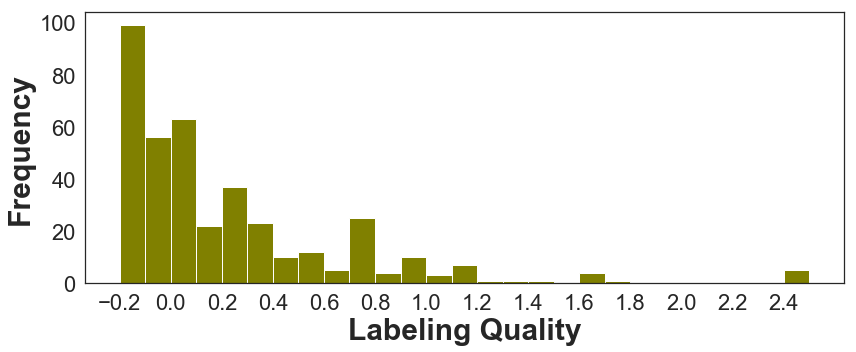

In [11]:
####Participants' Labeling Quality
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(12,5))


xlabels=[-0.2, 0.0,0.2, 0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4]
plt.xticks(xlabels)
ylabels = [l*10 for l in range(0,12) if l%2 == 0]
plt.yticks(ylabels)
ax = sns.distplot(overall_statistics.RANK_W, kde=False, bins = 27, hist_kws={"color": "olive", "alpha": 1.0})

ax.set_xlabel("Labeling Quality", fontsize=30, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=30, fontweight='bold')

plt.tick_params(labelsize=22)
plt.tight_layout()

plt.savefig('labeling_quality.png', bbox_inches='tight')

In [12]:
#### Select Top-quality Participants
query = "select Sentence_User.username as USERNAME from Sentence_User, Sentence \
where id = sentence_id and username not in ('cmavs2015', 'sakiforu', 'teaphony') and response != -2 and \
sentence_id not in (129, 1576, 3110, 3429, 4390, 5553, 5562, 5654, 5974, 6002, 6483, 7600, 9017, 9355, 9862, \
10060, 10762, 10863, 11025, 11112, 14933, 611, 15445, 15602, 15763, 16014, 16015, 16258, 16828, 17000, 17159, \
17420, 17509, 21636, 24352, 26145, 27100, 27828, 27986, 28777) \
group by Sentence_User.username having \
-0.2*(sum(if(screening = -1 and response = -1, 1, 0))+sum(if(screening = 0 and response = 0, 1, 0))+sum(if(screening = 1 and response = 1, 1, 0)))/(sum(screening != -3 and response != -2)) \
+0.7*(sum(if(screening = 0 and response = 1, 1, 0))+sum(if(screening = 1 and response = 0, 1, 0)))/(sum(screening != -3 and response != -2)) \
+0.7*(sum(if(screening = -1 and response = 0, 1, 0))+sum(if(screening = 0 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)) \
+2.5*(sum(if(screening = -1 and response = 1, 1, 0))+sum(if(screening = 1 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)) <= 0.0 and count(*) >= 50;"

cursor.execute(query)
#print (query)
result = cursor.fetchall()
top_quality_participants = []
for row in result:
    top_quality_participants.append(row[0])
print(top_quality_participants)

['66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'Deep90', 'deepoffer', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'mdb1923', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sar

In [13]:
#####Number of user skip vs Number of sentences vs Average Sentence Length
query = "SELECT total, count(total), sum(avg_len)/count(total) as avg_length FROM (SELECT count(sentence_id) as total, \
sum(length)/count(length) as avg_len \
FROM Sentence, Sentence_User \
WHERE id=sentence_id AND response=-2 AND screening=-3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto',\
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', \
'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', \
'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', \
'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', \
'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', \
'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', \
'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', \
'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', \
'whu1982', 'yusufertun', 'zwj') \
AND username!='test' AND file_id not in ('2016-10-04.txt', '2020-01-14.txt') GROUP BY sentence_id) A GROUP BY total;"


cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0],row[1],row[2])

1 3685 19.31641791
2 743 21.27321669
3 155 25.16129032
4 32 24.93750000
5 7 26.71428571
6 3 35.00000000
7 2 62.50000000


In [14]:
#####Total number of sentences that were skipped at least once
query = "SELECT count(total) FROM (SELECT count(sentence_id) as total FROM Sentence, Sentence_User \
WHERE id=sentence_id AND response=-2 AND screening=-3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto',\
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', \
'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', \
'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', \
'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', \
'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', \
'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', \
'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', \
'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', \
'whu1982', 'yusufertun', 'zwj') \
AND username!='test' AND file_id not in ('2016-10-04.txt', '2020-01-14.txt') GROUP BY sentence_id) A ;"


cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

4627


In [15]:
##### Sentences that were skipped by top quality users more than five times
query = "SELECT sentence_id, text, total FROM (SELECT sentence_id, text, count(*) as total \
FROM Sentence, Sentence_User \
WHERE id=sentence_id AND response=-2 AND screening=-3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto',\
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon',\
'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', \
'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', \
'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', \
'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', \
'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', \
'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', \
'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', \
'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', \
'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', \
'whu1982', 'yusufertun', 'zwj') \
AND username!='test' AND file_id not in ('2016-10-04.txt', '2020-01-14.txt') GROUP BY sentence_id) A WHERE total>=6 \
order by total;"


cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row)

(14452, "We don't want to overreact, as the federal regulators have in my judgment, on good banks so that they've created credit crunches, that is, they have made our recession worse in the last couple of years -- but we do want to act prudently with the banks that are in trouble.", 6)
(13088, 'As a matter of fact, the statement that Senator Kennedy made was that - to the effect that there were trigger-happy Republicans, that my stand on Quemoy and Matsu was an indication of trigger-happy Republicans.', 6)
(14261, 'I would like the record to show the panelists that Ross Perot took the first shot at the press.', 6)
(13911, "You implement that NAFTA, the Mexican trade agreement, where they pay people a dollar an hour, have no health care, no retirement, no pollution controls, et cetera, et cetera, et cetera, and you're going to hear a giant sucking sound of jobs being pulled out of this country right at a time when we need the tax base to pay the debt and pay down the interest on the deb

In [16]:
#####Number of User Responses vs NFS
query="select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, -1 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (nfs >= 2 \
AND nfs > (nfs + ufs + cfs)/2)) A WHERE A.verdict = -1) group by total \
UNION \
select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, -1 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (nfs >cfs AND nfs>ufs AND nfs<=(nfs + ufs + cfs)/2)) B WHERE B.verdict = -1) group by total \
;"    



cursor.execute(query)
#print (query)
result = cursor.fetchall()
for row in result:
    print(row)


(2, 9388)
(3, 4545)
(4, 224)
(5, 309)
(6, 6)
(7, 88)
(8, 3)
(9, 28)
(11, 12)
(13, 20)
(15, 11)
(17, 1)
(6, 4)
(7, 1)
(14, 6)
(15, 14)
(16, 17)
(17, 7)
(18, 1)


In [17]:
#####Number of User Responses vs UFS
query="select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 0 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (ufs >= 2 \
AND ufs > (nfs + ufs + cfs)/2)) A WHERE A.verdict = 0) group by total \
UNION \
select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 0 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (ufs>cfs AND ufs>=nfs AND ufs<=(nfs + ufs + cfs)/2)) B WHERE B.verdict = 0) group by total \
;"    



cursor.execute(query)
#print (query)
result = cursor.fetchall()
for row in result:
    print(row)


(2, 844)
(3, 1192)
(4, 40)
(5, 152)
(6, 2)
(7, 41)
(8, 1)
(9, 26)
(11, 11)
(13, 9)
(14, 1)
(15, 7)
(16, 1)
(17, 1)
(4, 3)
(5, 3)
(6, 5)
(7, 2)
(11, 1)
(13, 1)
(14, 8)
(15, 10)
(16, 25)
(17, 15)
(18, 1)


In [18]:
#####Number of User Responses vs CFS
query="select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 1 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (cfs >= 2 \
AND cfs > (nfs + ufs + cfs)/2)) A WHERE A.verdict = 1) group by total \
UNION \
select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 1 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (cfs>=ufs AND cfs>=nfs AND cfs<=(nfs + ufs + cfs)/2)) B WHERE B.verdict = 1) group by total \
;"    



cursor.execute(query)
#print (query)
result = cursor.fetchall()
for row in result:
    print(row)



(2, 2824)
(3, 2128)
(4, 65)
(5, 169)
(6, 3)
(7, 77)
(8, 3)
(9, 17)
(11, 17)
(12, 2)
(13, 6)
(14, 1)
(15, 5)
(17, 1)
(5, 7)
(6, 9)
(8, 2)
(13, 3)
(14, 9)
(15, 21)
(16, 32)
(17, 10)
(18, 2)


In [19]:
#####Crowd-sourced sentences along with their labels
query = "SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, -1 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (nfs >= 2 \
AND nfs > (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 0 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (ufs >= 2 \
AND ufs > (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 1 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (cfs >= 2 \
AND cfs > (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 1 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING ((cfs+ufs+nfs)>=5 and cfs>=ufs and cfs>=nfs and cfs <= (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 0 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (ufs>cfs and ufs>=nfs and ufs <= (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, -1 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id not in ('2016-10-04.txt', '2020-01-14.txt') \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (nfs>cfs and nfs>ufs and nfs <= (nfs + ufs + cfs)/2) \
;"



crowdsourced_df = pd.read_sql_query(query, db)
crowdsourced_df.head()


Sentence_id                                               Text  \
0           16      I think we've seen a deterioration of values.   
1           17  I think for a while as a nation we condoned th...   
2           18  For a while, as I recall, it even seems to me ...   
3           19  So we've seen a deterioration in values, and o...   
4           20  We got away, we got into this feeling that val...   

       Speaker   Speaker_title Speaker_party         File_id  Length  \
0  George Bush  Vice President    REPUBLICAN  1988-09-25.txt       8   
1  George Bush  Vice President    REPUBLICAN  1988-09-25.txt      16   
2  George Bush  Vice President    REPUBLICAN  1988-09-25.txt      29   
3  George Bush  Vice President    REPUBLICAN  1988-09-25.txt      35   
4  George Bush  Vice President    REPUBLICAN  1988-09-25.txt      15   

   Line_number  Sentiment  nfs  ufs  cfs  Verdict  
0           16   0.000000  2.0  0.0  0.0       -1  
1           17  -0.456018  2.0  0.0  0.0       -1  
2           18  -0.805547  2.0  0.0  0.0       -1  
3           19   0.698942  2.0  0.0  1.0       -1  
4           20   0.000000  2.0  0.0  0.0       -1

In [20]:
crowdsourced_df['File_id'] = crowdsourced_df['File_id'].astype('str')
crowdsourced_df['File_id'] = crowdsourced_df['File_id'].str.replace("b'", "")
crowdsourced_df['File_id'] = crowdsourced_df['File_id'].str.replace("'", "")
crowdsourced_df['Line_number'] = crowdsourced_df['Line_number'].astype('str')
crowdsourced_df['Line_number'] = crowdsourced_df['Line_number'].str.replace("b'", "")
crowdsourced_df['Line_number'] = crowdsourced_df['Line_number'].str.replace("'", "")


# Sort the rows of dataframe by column 'Name' in descending order
crowdsourced_df_final = crowdsourced_df.sort_values(by ='Sentence_id' , ascending=True)
#crowdsourced_df.to_csv ('inter-coder-agreement.csv', index = None, header=True)

In [21]:
crowdsourced_df_final['Verdict'] = crowdsourced_df_final['Verdict'].map({-1: 'NFS', 0: 'UFS', 1:'CFS'})
crowdsourced_df_final['Speaker_party'] = crowdsourced_df_final['Speaker_party'].map({'DEMOCRAT': 'Democrat', 'REPUBLICAN': 'Republican', 'INDEPENDENT':'Independent'})
crowdsourced_df_final.head()

Sentence_id                                               Text  \
0           16      I think we've seen a deterioration of values.   
1           17  I think for a while as a nation we condoned th...   
2           18  For a while, as I recall, it even seems to me ...   
3           19  So we've seen a deterioration in values, and o...   
4           20  We got away, we got into this feeling that val...   

       Speaker   Speaker_title Speaker_party         File_id  Length  \
0  George Bush  Vice President    Republican  1988-09-25.txt       8   
1  George Bush  Vice President    Republican  1988-09-25.txt      16   
2  George Bush  Vice President    Republican  1988-09-25.txt      29   
3  George Bush  Vice President    Republican  1988-09-25.txt      35   
4  George Bush  Vice President    Republican  1988-09-25.txt      15   

  Line_number  Sentiment  nfs  ufs  cfs Verdict  
0          16   0.000000  2.0  0.0  0.0     NFS  
1          17  -0.456018  2.0  0.0  0.0     NFS  
2          18  -0.805547  2.0  0.0  0.0     NFS  
3          19   0.698942  2.0  0.0  1.0     NFS  
4          20   0.000000  2.0  0.0  0.0     NFS

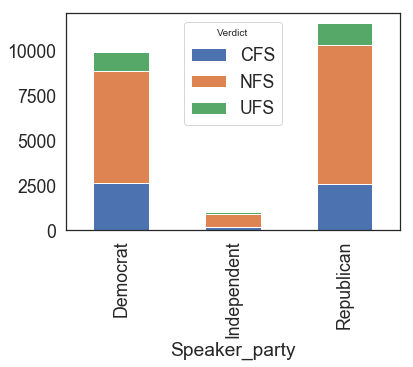

In [22]:
crowdsourced_df_final.groupby(['Speaker_party','Verdict']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [23]:
crowdsourced_df_final.groupby(['Speaker_party','Verdict']).size()


Speaker_party  Verdict
Democrat       CFS        2650
               NFS        6221
               UFS        1080
Independent    CFS         188
               NFS         736
               UFS          91
Republican     CFS        2575
               NFS        7728
               UFS        1232
dtype: int64

In [24]:
###### Drop'nfs', 'ufs', 'cfs' columns and save the results in a csv file
dfc=crowdsourced_df.drop(['nfs', 'ufs', 'cfs'], axis=1)
#print(len(dfc))
dfc['File_id'] = dfc['File_id'].astype('str')
dfc['File_id'] = dfc['File_id'].str.replace("b'", "")
dfc['File_id'] = dfc['File_id'].str.replace("'", "")
dfc['Line_number'] = dfc['Line_number'].astype('str')
dfc['Line_number'] = dfc['Line_number'].str.replace("b'", "")
dfc['Line_number'] = dfc['Line_number'].str.replace("'", "")



# Sort the rows of dataframe by column 'Name' in descending order
dfc = dfc.sort_values(by ='Sentence_id' , ascending=True)
#dfc.to_csv ('crowdsourced.csv', index = None, header=True)


In [25]:
#### Top-10-quality Participants and Their Profession
query="select profession, count(profession) from \
    User \
    where \
    username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
    'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
    'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
    'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
    'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
    'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
    'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
    'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
    'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
    'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
    'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
    'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
    'yusufertun', 'zwj') \
    group by profession;"

cursor.execute(query)
result = cursor.fetchall()
top_quality_participants = []
for row in result:
    print(row)




(None, 0)
('Journalist/Reporter', 4)
('Librarian', 1)
('marketing staff', 1)
('nurse', 1)
('Professor', 5)
('Staff', 1)
('Student', 86)
('test', 1)


In [26]:
#### All Participants and Their Profession
query='select PROFESSION, count(PROFESSION) from (select \
    Sentence_User.username as USERNAME, profession as PROFESSION \
    from \
    Sentence_User, User \
    where \
    Sentence_User.username = User.username and \
    Sentence_User.username != "factchecker" and \
    Sentence_User.time < "2020" and\
    sentence_id not in (129, 1576, 3110, 3429, 4390, 5553, 5562, 5654, 5974, 6002, 6483, 7600, 9017, 9355, 9862, \
    10060, 10762, 10863, 11025, 11112, 14933, 611, 15445, 15602, 15763, 16014, 16015, 16258, 16828, 17000, 17159, \
    17420, 17509, 21636, 24352, 26145, 27100, 27828, 27986, 28777) \
    group by Sentence_User.username) A group by PROFESSION;'

cursor.execute(query)
result = cursor.fetchall()
top_quality_participants = []
for row in result:
    print(row)

('', 3)
(' HS student', 1)
('analyst', 1)
('Citizen', 1)
('Communications Editor', 1)
('Data Analyst', 1)
('Engineer', 1)
('Executive', 1)
('Job coach', 1)
('Journalist/Reporter', 6)
('Librarian', 1)
('marketing staff', 1)
('nurse', 1)
('Professional', 1)
('Professor', 10)
('Recent Graduate', 1)
('Staff', 1)
('Student', 370)
('test', 1)
('University Staff', 1)


In [27]:
###### Ground-truth sentences labeled by three experts
###################################################################
query = "SELECT Sentence.id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
screening as Verdict \
FROM Sentence, Speaker_File, Speaker \
WHERE Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND screening in (-1,0,1) \
GROUP BY Sentence.id;"

groundtruth_df = pd.read_sql_query(query, db)
groundtruth_df.head()


Sentence_id                                               Text  \
0           26      You know, I saw a movie - "Crocodile Dundee."   
1           80  We're consuming 50 percent of the world's coca...   
2          129   That answer was about as clear as Boston harbor.   
3          131                          Let me help the governor.   
4          172  We've run up more debt in the last eight years...   

           Speaker   Speaker_title Speaker_party         File_id  Length  \
0      George Bush  Vice President    REPUBLICAN  1988-09-25.txt       9   
1  Michael Dukakis        Governor      DEMOCRAT  1988-09-25.txt       8   
2      George Bush  Vice President    REPUBLICAN  1988-09-25.txt       9   
3      George Bush  Vice President    REPUBLICAN  1988-09-25.txt       5   
4  Michael Dukakis        Governor      DEMOCRAT  1988-09-25.txt      22   

   Line_number  Sentiment  Verdict  
0           26   0.000000        0  
1           80  -0.740979        1  
2          129   0.000000       -1  
3          131   0.212987       -1  
4          172  -0.268506        1

In [28]:
##### Save the results in a csv file
print(len(groundtruth_df))
#groundtruth_df.to_csv ('groundtruth.csv', index = None, header=True)

1032


In [29]:
###### All sentences from all general election presidential debates
###################################################################
query = "SELECT Sentence.id as Sentence_id, text as Text, Speaker.name as Speaker, Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Speaker_File.role as Speaker_role, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment  \
FROM Sentence, Speaker_File, Speaker \
WHERE Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
UNION \
SELECT Sentence.id as Sentence_id, text as Text, Speaker.name as Speaker, 'None' as Speaker_title, \
'None' as Speaker_party, 'None' as Speaker_role, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment  \
FROM Sentence, Speaker \
WHERE Sentence.speaker_id = Speaker.id \
AND Sentence.file_id!='2016-10-04.txt' \
AND Sentence.speaker_id=0;"

all_sentences_df = pd.read_sql_query(query, db)
all_sentences_df.head()



Sentence_id                                               Text     Speaker  \
0            3                                      Good evening.  Jim Lehrer   
1            4  On behalf of the Commission on Presidential De...  Jim Lehrer   
2            5     I'm Jim Lehrer of the McNeil-Lehrer News Hour.  Jim Lehrer   
3            6  My colleagues on the panel are John Mashek of ...  Jim Lehrer   
4            7  For the next 90 minutes we will be questioning...  Jim Lehrer   

  Speaker_title Speaker_party Speaker_role         File_id  Length  \
0                        None    Moderator  1988-09-25.txt       2   
1                        None    Moderator  1988-09-25.txt      23   
2                        None    Moderator  1988-09-25.txt       8   
3                        None    Moderator  1988-09-25.txt      24   
4                        None    Moderator  1988-09-25.txt      30   

   Line_number  Sentiment  
0            3   0.343189  
1            4   0.810043  
2            5   0.000000  
3            6   0.000000  
4            7   0.223190

In [30]:
######## Change 'Interviewee' to 'Candidate' and save the results
all_sentences_df.loc[all_sentences_df.Speaker_role == 'Interviewee', 'Speaker_role'] = 'Candidate'
all_sentences_df = all_sentences_df.sort_values(by ='Sentence_id' , ascending=True)
print(len(all_sentences_df))
#all_sentences_df.to_csv ('all_sentences.csv', index = None, header=True)

33536
